In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
features = pd.read_csv('data/features.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [3]:
features = features.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
features.head(3)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False


In [4]:
stores = pd.read_csv('data/stores.csv')
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [5]:
train = pd.read_csv('data/train.csv')
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [6]:
len(train['Date'].unique())

143

In [7]:
test = pd.read_csv('data/test.csv')
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [8]:
train = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'])
train = pd.merge(train, stores, on=['Store'])
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315


In [9]:
len(test['Date'].unique())

39

In [10]:
test = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'])
test = pd.merge(test, stores, on=['Store'])
test.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315


In [11]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
train['Week'] = train.apply(lambda row: row.Date.strftime('%U'), axis=1)
train['Year'] = train.apply(lambda row: row.Date.strftime('%Y'), axis=1)
train['Week'] = train['Week'].astype(int)
train['Year'] = train['Year'].astype(int)

test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
test['Week'] = test.apply(lambda row: row.Date.strftime('%U'), axis=1)
test['Year'] = test.apply(lambda row: row.Date.strftime('%Y'), axis=1)
test['Week'] = test['Week'].astype(int)
test['Year'] = test['Year'].astype(int)

In [12]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Week                     int64
Year                     int64
dtype: object

In [13]:
mean_sales = train.groupby(['Date'])['Weekly_Sales'].mean().reset_index()
medeian_sales = train.groupby(['Date'])['Weekly_Sales'].median().reset_index()

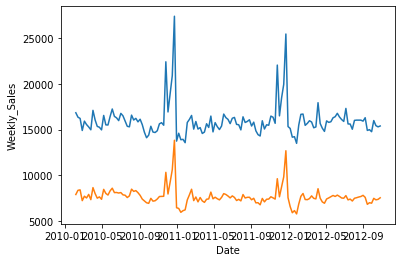

In [14]:
sns.lineplot(x='Date', y='Weekly_Sales', data=mean_sales)
sns.lineplot(x='Date', y='Weekly_Sales', data=medeian_sales)

In [15]:
store_5 = train[train['Store'] == 5].groupby(['Date']).mean().reset_index()
store_31 = train[train['Store'] == 31].groupby(['Date']).mean().reset_index()

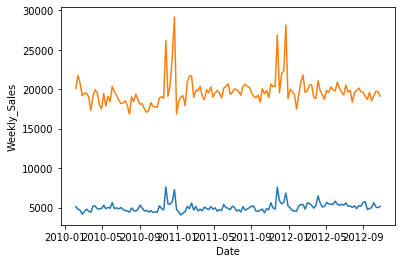

In [16]:
sns.lineplot(x='Date', y='Weekly_Sales', data=store_5)
sns.lineplot(x='Date', y='Weekly_Sales', data=store_31)

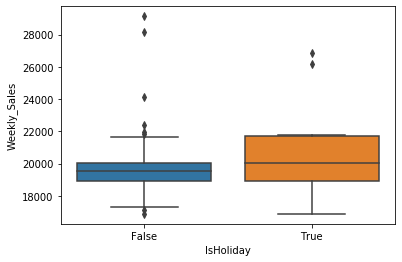

In [17]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=store_31)

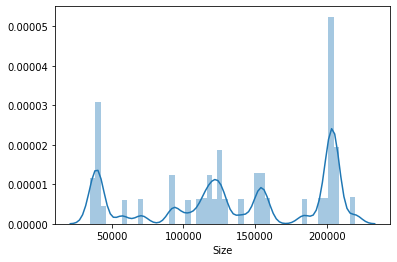

In [18]:
sns.distplot(train['Size'])

In [19]:
train = train.sort_values(by=['Date', 'Store', 'Dept'])
test = test.sort_values(by=['Date', 'Store', 'Dept'])

In [20]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,5,2010


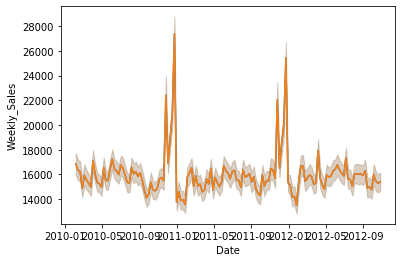

In [21]:
sns.lineplot(x='Date', y='Weekly_Sales', data=train)
train['Weekly_Sales'] = train['Weekly_Sales'].ewm(com=0.03).mean()
sns.lineplot(x='Date', y='Weekly_Sales', data=train)

In [22]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.500000,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,49878.455755,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,14791.825937,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39221.177560,False,42.31,2.572,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32433.024447,False,42.31,2.572,211.096358,8.106,A,151315,5,2010


In [23]:
train.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week,Year
Store,1.000000,0.024004,-0.086670,-0.000548,-0.050097,0.065290,-0.211088,0.208552,-0.182881,0.001031,0.002997
Dept,0.024004,1.000000,0.151178,0.000916,0.004437,0.003572,-0.007477,0.007837,-0.002966,0.000882,0.003738
Weekly_Sales,-0.086670,0.151178,1.000000,0.012996,-0.002354,-0.000119,-0.021284,-0.026295,0.248013,0.028155,-0.010287
IsHoliday,-0.000548,0.000916,0.012996,1.000000,-0.155949,-0.078281,-0.001944,0.010460,0.000593,0.128184,-0.056746
Temperature,-0.050097,0.004437,-0.002354,-0.155949,1.000000,0.143859,0.182112,0.096730,-0.058313,0.236276,0.065814
Fuel_Price,0.065290,0.003572,-0.000119,-0.078281,0.143859,1.000000,-0.164210,-0.033853,0.003361,-0.031140,0.779633
CPI,-0.211088,-0.007477,-0.021284,-0.001944,0.182112,-0.164210,1.000000,-0.299953,-0.003314,0.006342,0.074544
Unemployment,0.208552,0.007837,-0.026295,0.010460,0.096730,-0.033853,-0.299953,1.000000,-0.068238,-0.015490,-0.237161
Size,-0.182881,-0.002966,0.248013,0.000593,-0.058313,0.003361,-0.003314,-0.068238,1.000000,-0.001292,-0.004975
Week,0.001031,0.000882,0.028155,0.128184,0.236276,-0.031140,0.006342,-0.015490,-0.001292,1.000000,-0.181797


In [24]:
test_date = test['Date']

features = ['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year']
train = train[features + ['Weekly_Sales']]
test = test[features]

In [25]:
train['Sample weights'] = train.apply(lambda row: 5 if row.IsHoliday else 1, axis=1)
train.head(3)

,Store,Dept,IsHoliday,Size,Week,Year,Weekly_Sales,Sample weights
0,1,1,False,151315,5,2010,24924.500000,1
1,1,2,False,151315,5,2010,49878.455755,1
2,1,3,False,151315,5,2010,14791.825937,1


In [26]:
y = train['Weekly_Sales']
X = train.drop(['Weekly_Sales'], axis=1)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.272727)

w_train = X_train['Sample weights']
w_valid = X_valid['Sample weights']
X_train = X_train.drop(['Sample weights'], axis=1)
X_valid = X_valid.drop(['Sample weights'], axis=1)

X = X.drop(['Sample weights'], axis=1)

In [28]:
rfr_model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfr_model.fit(X_train, y_train)

y_rfr = rfr_model.predict(X_valid)
mean_absolute_error(y_rfr, y_valid, sample_weight=w_valid)

1460.591086284887

In [29]:
y_rfr

array([21778.04652558, 35441.40706989, 95316.04503925, ...,
        5462.81339581,  2127.46131705,  6249.25078318])

In [30]:
y_pred = y_rfr
mean_absolute_error(y_pred, y_valid, sample_weight=w_valid)

1460.591086284887

In [31]:
pY = pd.DataFrame({'Weekly_Sales': y_pred})
vY = pd.DataFrame({'Weekly_Sales': y_valid.values})

In [32]:
Y = pY.reset_index().merge(vY.reset_index(), suffixes=['_Predicted', '_Valid'], on=['index']).set_index('index')
Y = Y.sort_values(by='Weekly_Sales_Predicted').reset_index(drop=True)
Y.head(3)

,Weekly_Sales_Predicted,Weekly_Sales_Valid
0,-2030.322791,423.643770
1,-90.577832,83.421398
2,-80.895712,14.612684


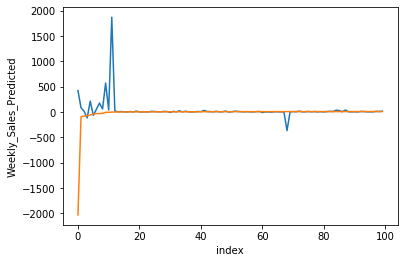

In [33]:
sns.lineplot(x='index', y='Weekly_Sales_Valid', data=Y.reset_index().head(100))
sns.lineplot(x='index', y='Weekly_Sales_Predicted', data=Y.reset_index().head(100))

In [34]:
rfr_model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
y_res = rfr_model.predict(test)

In [36]:
test['Date'] = test_date
test['Weekly_Sales'] = y_res
test.head()

,Store,Dept,IsHoliday,Size,Week,Year,Date,Weekly_Sales
0,1,1,False,151315,44,2012,2012-11-02,30392.128032
1,1,2,False,151315,44,2012,2012-11-02,45521.200150
2,1,3,False,151315,44,2012,2012-11-02,10484.571792
3,1,4,False,151315,44,2012,2012-11-02,36050.255205
4,1,5,False,151315,44,2012,2012-11-02,27189.777525


In [37]:
test['Id'] = test.apply(lambda row: f'{row["Store"]}_{row["Dept"]}_{row["Date"].strftime("%Y-%m-%d")}', axis=1)
test.head()

,Store,Dept,IsHoliday,Size,Week,Year,Date,Weekly_Sales,Id
0,1,1,False,151315,44,2012,2012-11-02,30392.128032,1_1_2012-11-02
1,1,2,False,151315,44,2012,2012-11-02,45521.200150,1_2_2012-11-02
2,1,3,False,151315,44,2012,2012-11-02,10484.571792,1_3_2012-11-02
3,1,4,False,151315,44,2012,2012-11-02,36050.255205,1_4_2012-11-02
4,1,5,False,151315,44,2012,2012-11-02,27189.777525,1_5_2012-11-02


In [38]:
submission = test[['Id', 'Weekly_Sales']].set_index(['Id'])
submission.head()

,Weekly_Sales
Id,
1_1_2012-11-02,30392.128032
1_2_2012-11-02,45521.200150
1_3_2012-11-02,10484.571792
1_4_2012-11-02,36050.255205
1_5_2012-11-02,27189.777525


In [39]:
submission.to_csv('data/submission.csv')